<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/Assignment12/Part2/kmeans_dog_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from os import listdir
from PIL import Image as PImage

def loadImages(path):
  imagesList = listdir(path)
  images = []
  for image in imagesList:
    img = PImage.open(path + image)
    images.append(img)
  return images

image_folder_path = "/content/gdrive/My Drive/Colab Notebooks/EVA4.0/Phase1/Session12/part2/dog_dataset/"
images = loadImages(image_folder_path)
image_names = []
map_img_size = {}
for image in images:
  image_height, image_width = image.size
  image_name = image.filename.split('/')[10]
  image_names.append(image_name)
  map_img_size[image_name] = (image_width, image_height)
print(map_img_size)

{'dog19.jpg': (183, 275), 'dog50.jpg': (172, 293), 'dog45.jpg': (168, 299), 'dog47.jpg': (186, 271), 'dog40.jpg': (168, 299), 'dog46.jpg': (168, 299), 'dog41.jpg': (275, 183), 'dog43.jpg': (164, 308), 'dog42.jpg': (183, 275), 'dog44.jpg': (183, 275), 'dog48.jpg': (175, 287), 'dog15.jpg': (183, 275), 'dog16.jpg': (183, 275), 'dog28.jpg': (168, 300), 'dog17.jpg': (225, 225), 'dog01.jpg': (123, 164), 'dog14.jpg': (168, 300), 'dog29.jpg': (198, 255), 'dog49.jpg': (180, 281), 'dog03.jpg': (123, 185), 'dog02.jpg': (123, 185), 'dog05.jpg': (123, 172), 'dog12.jpg': (122, 183), 'dog06.jpg': (123, 184), 'dog07.jpg': (123, 185), 'dog10.jpg': (122, 170), 'dog39.jpg': (183, 275), 'dog04.jpg': (123, 194), 'dog13.jpg': (187, 269), 'dog11.jpg': (122, 161), 'dog38.jpg': (185, 272), 'dog35.jpg': (163, 310), 'dog22.jpg': (168, 300), 'dog37.jpg': (183, 275), 'dog21.jpg': (168, 300), 'dog34.jpg': (224, 225), 'dog36.jpg': (156, 322), 'dog08.jpg': (123, 181), 'dog09.jpg': (122, 183), 'dog20.jpg': (168, 300),

In [0]:
nc_x_bbox = []
nc_y_bbox = []

n_w_bbox = []
n_h_bbox = []

for i in range(50):
  shape_attributes_dict = shape_attributes[i][0]
  shape_x = shape_attributes_dict['shape_attributes']['x']
  shape_y = shape_attributes_dict['shape_attributes']['y']
  shape_width = shape_attributes_dict['shape_attributes']['width']
  shape_height = shape_attributes_dict['shape_attributes']['height']
  image_name = image_names[i]

  n_shape_x = shape_x/map_img_size[image_name][1]
  n_shape_y = shape_y/map_img_size[image_name][0]
  n_shape_width = shape_width / map_img_size[image_name][1]
  n_shape_height = shape_height / map_img_size[image_name][0]

  n_w_bbox.append(n_shape_width)
  n_h_bbox.append(n_shape_height)

  nc_x_bbox.append(n_shape_x + (n_shape_width/2))
  nc_y_bbox.append(n_shape_y + (n_shape_height/2))

print("Normalized:Centroids:X,Y Lists")

print(nc_x_bbox[:2])
print(nc_y_bbox[:2]) 
print("Normalized::Width,Height Lists")

print(n_w_bbox[:2])
print(n_h_bbox[:2])

Normalized:Centroids:X,Y Lists
[0.23454545454545456, 0.31399317406143346]
[0.360655737704918, 0.3313953488372093]
Normalized::Width,Height Lists
[0.14181818181818182, 0.621160409556314]
[0.3825136612021858, 0.4883720930232558]


Cluster Centers: [[0.37833322 0.54605346]
 [0.7594709  0.90200476]
 [1.3015715  1.32372607]
 [0.42947663 1.13547349]
 [1.02151559 0.60655217]]


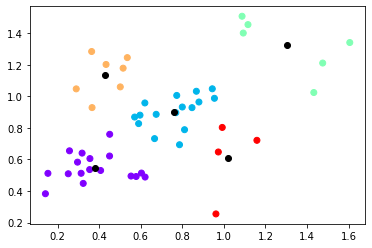

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
df1 = pd.DataFrame({
    'x': n_w_bbox,
    'y': n_h_bbox
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(df1)
print("Cluster Centers:",kmeans.cluster_centers_)

plt.scatter(n_w_bbox,n_h_bbox, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [0]:
import numpy as np
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X = np.array(list(zip(n_w_bbox, n_h_bbox))).reshape(len(n_w_bbox), 2)   
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

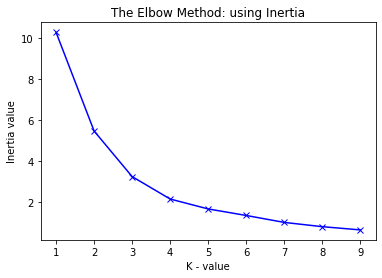

In [86]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('K - value') 
plt.ylabel('Inertia value') 
plt.title('The Elbow Method: using Inertia') 
plt.show()

Cluster Centers: [[0.86625132 0.83267286]
 [0.48944656 1.04398487]
 [0.37833322 0.54605346]
 [1.3015715  1.32372607]]


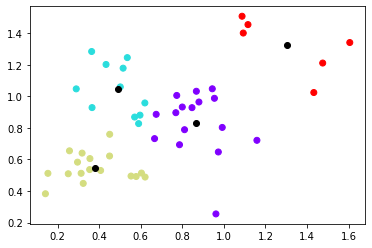

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
df1 = pd.DataFrame({
    'x': n_w_bbox,
    'y': n_h_bbox
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df1)
print("Cluster Centers:",kmeans.cluster_centers_)

plt.scatter(n_w_bbox,n_h_bbox, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')